# Reaction Metrics and Validation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## Choosing a file

In [2]:
filename = 'Chernosky1985-phase-rxn.xlsx'
path = '../../../data/phase-rxn/'
path += filename

## Creating pandas dataframe

In [27]:
# full spreadsheet
data = pd.read_excel(path,sheetname=None,skiprows=[None,None,1,1,1,1,1])
# summary data
df = pd.concat([data['rxn']['rxn_studied'],
                data['experimental_conditions']['P'], 
                data['experimental_conditions']['P_err'],
                data['experimental_conditions']['T'], 
                data['experimental_conditions']['T_err'],
                data['experimental_conditions']['equil_time'],
                data['rxn']['rxn_metric_resid'],
                data['rxn']['results']], axis=1)

## Viewing tabulated summary data

In [29]:
df

rxn_studied     P  P_err    T  T_err  equil_time  \
0         Tlc = 3 En + Qz + H2O    0.5   0.05  656      3        2160   
1         Tlc = 3 En + Qz + H2O    1.0   0.05  700      6        2256   
2         Tlc = 3 En + Qz + H2O   10.0   0.30  780      5          46   
3         Tlc = 3 En + Qz + H2O   10.0   0.30  790      5          44   
4         Tlc = 3 En + Qz + H2O   10.0   0.30  800      5         110   
5         Tlc = 3 En + Qz + H2O   13.0   0.30  800      5          67   
6         Tlc = 3 En + Qz + H2O   13.6   0.30  785      5          47   
7         Tlc = 3 En + Qz + H2O   17.0   0.30  795      5          38   
8          Ath = 7 En + Qz + H2O  10.0   0.30  810      5          89   
9          Ath = 7 En + Qz + H2O  10.0   0.30  820      5          70   
10         Tlc + Fo = 5 En + H2O   1.0   0.05  652      3        2136   
11         Tlc + Fo = 5 En + H2O   2.0   0.05  650      2        2472   
12         Tlc + Fo = 5 En + H2O   3.0   0.05  673      3        2472   
13         Tlc + Fo = 5 En + H2O   4.0   0.05  691      3        1896   
14         Tlc + Fo = 5 En + H2O   6.0   0.05  679      2        1632   
15         Tlc + Fo = 5 En + H2O   6.0   0.05  694      2        2472   
16  9 Tlc + 4 Fo = 5 Ath + 4 H2O   0.5   0.05  597      7        1608   
17  9 Tlc + 4 Fo = 5 Ath + 4 H2O   0.5   0.05  632      4        1776   
18  9 Tlc + 4 Fo = 5 Ath + 4 H2O   0.5   0.05  667      2        1728   
19  9 Tlc + 4 Fo = 5 Ath + 4 H2O   0.5   0.05  678      4        2184   
20  9 Tlc + 4 Fo = 5 Ath + 4 H2O   1.0   0.05  626      5        3216   
21  9 Tlc + 4 Fo = 5 Ath + 4 H2O   1.0   0.05  646      5        6720   
22  9 Tlc + 4 Fo = 5 Ath + 4 H2O   2.0   0.05  635      6        6696   
23  9 Tlc + 4 Fo = 5 Ath + 4 H2O   2.0   0.05  660      3        1680   
24  9 Tlc + 4 Fo = 5 Ath + 4 H2O   2.0   0.05  680      2        1704   
25  9 Tlc + 4 Fo = 5 Ath + 4 H2O   3.0   0.05  633      2        1728   
26  9 Tlc + 4 Fo = 5 Ath + 4 H2O   3.0   0.05  666      4        4488   
27  9 Tlc + 4 Fo = 5 Ath + 4 H2O   3.0   0.05  675      5        1728   
28  9 Tlc + 4 Fo = 5 Ath + 4 H2O   3.0   0.05  702      3        1464   
29  9 Tlc + 4 Fo = 5 Ath + 4 H2O   4.0   0.05  677      5        1632   
..                           ...   ...    ...  ...    ...         ...   
43         Ath + Fo = 9 En + H2O   3.0   0.05  695      2        3072   
44         Ath + Fo = 9 En + H2O   3.0   0.05  734      2        3048   
45         Ath + Fo = 9 En + H2O   4.0   0.05  654      2        1584   
46         Ath + Fo = 9 En + H2O   4.0   0.05  677      5        1632   
47         Ath + Fo = 9 En + H2O   5.0   0.05  632      7        1608   
48         Ath + Fo = 9 En + H2O   5.0   0.05  666      4        1344   
49         Ath + Fo = 9 En + H2O   5.0   0.05  675      3        4368   
50         Ath + Fo = 9 En + H2O   5.0   0.05  684      3        1392   
51         Ath + Fo = 9 En + H2O   5.0   0.05  735      1        1968   
52         Ath + Fo = 9 En + H2O   6.0   0.05  661      2        1680   
53         Ath + Fo = 9 En + H2O   6.0   0.05  701      6        3024   
54              Tlc + 4 En = Ath   4.0   0.05  610      2        1104   
55              Tlc + 4 En = Ath   5.0   0.05  686      2        2064   
56              Tlc + 4 En = Ath   6.0   0.05  655      2         792   
57              Tlc + 4 En = Ath   6.0   0.05  665      3        3552   
58              Tlc + 4 En = Ath   6.0   0.05  674      2        3552   
59              Tlc + 4 En = Ath   6.0   0.05  689      3        2016   
60              Tlc + 4 En = Ath   8.0   0.30  770      5         149   
61              Tlc + 4 En = Ath   9.0   0.30  770      5         143   
62              Tlc + 4 En = Ath  10.0   0.30  730      5           4   
63              Tlc + 4 En = Ath  10.2   0.30  755      5          65   
64              Tlc + 4 En = Ath  10.0   0.30  765      5         189   
65              Tlc + 4 En = Ath  10.0   0.30  770      5          92   
66    

## Reactions studied and number of experiments

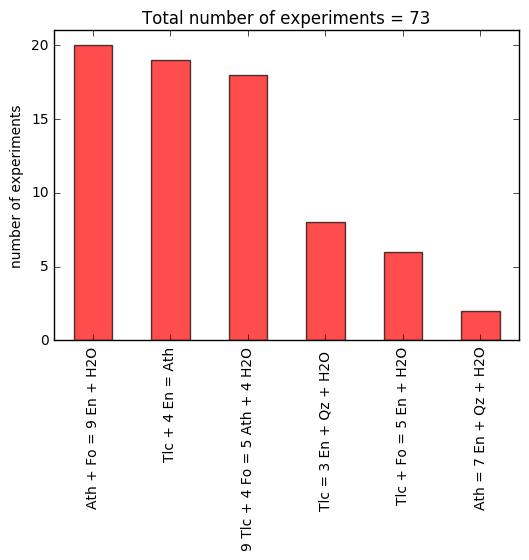

In [30]:
N = df['rxn_studied'].count()
df['rxn_studied'].value_counts().plot.bar(color='r',alpha=0.7)
plt.ylabel('number of experiments')
plt.ylim([0,max(df['rxn_studied'].value_counts())+1])
plt.title('Total number of experiments = {}'.format(N))
plt.show()

## P-T plots of experiments

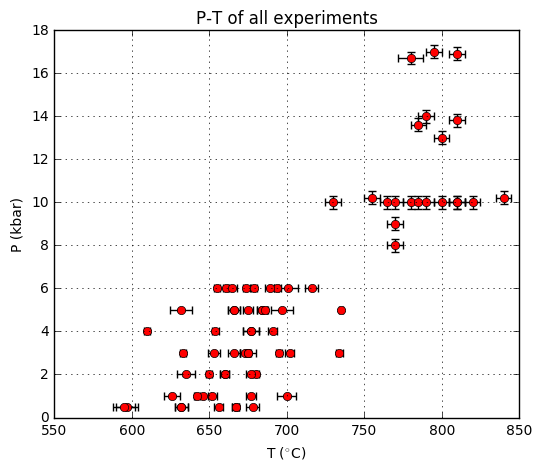

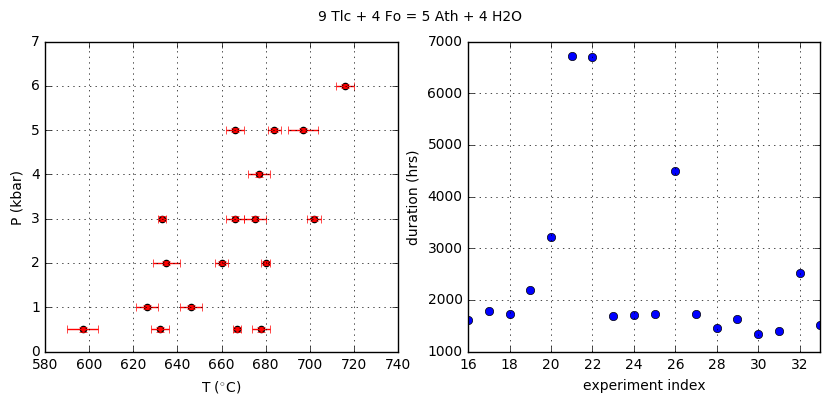

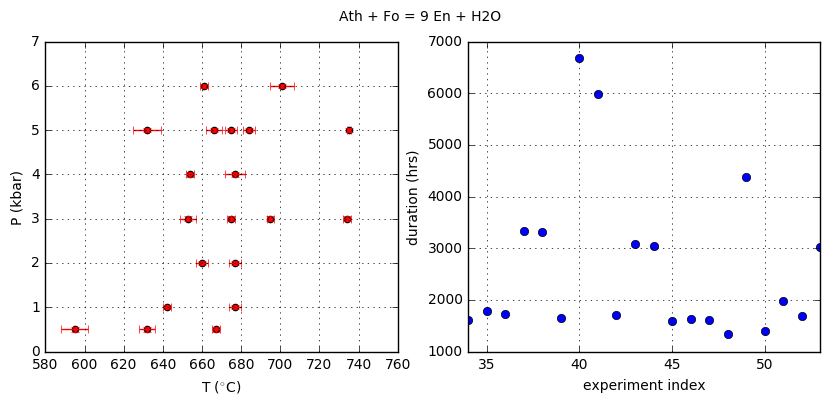

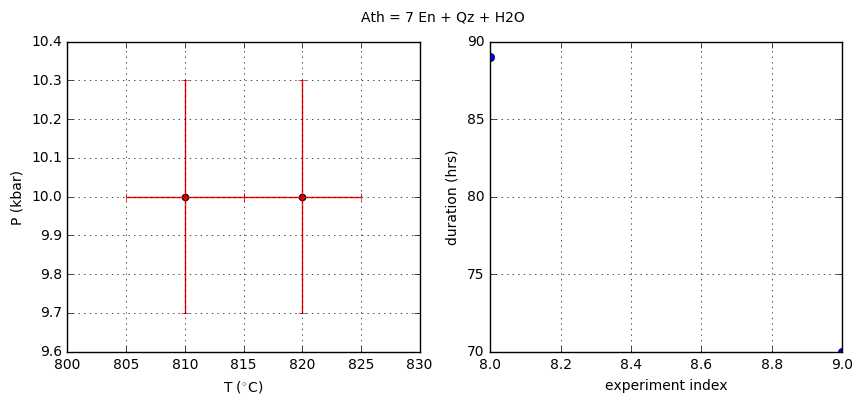

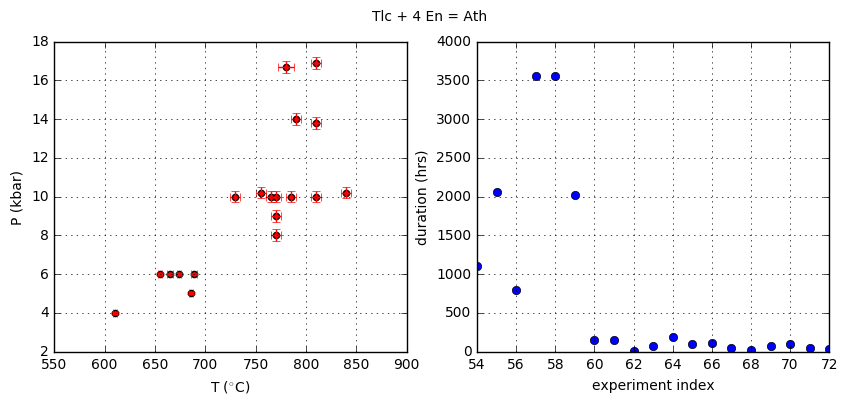

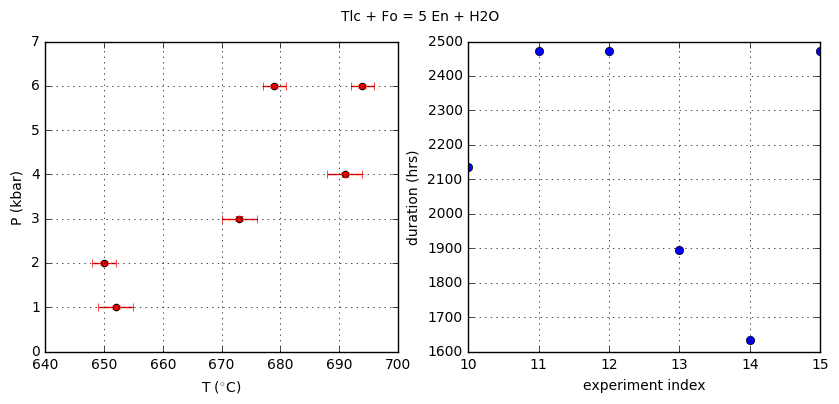

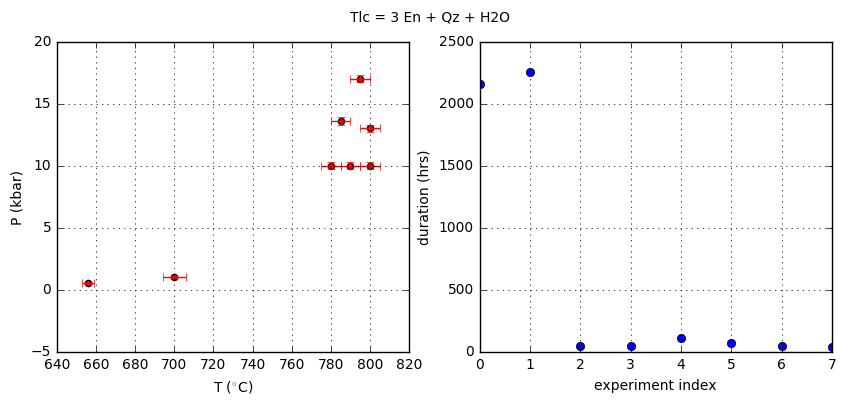

In [33]:
plt.figure(figsize=(6,5))
plt.errorbar(df['T'],df['P'],xerr=df['T_err'],yerr=df['P_err'],fmt='ro', ecolor='k', capthick=1)
plt.grid()
plt.xlabel("T ($^{\circ}$C)")
plt.ylabel("P (kbar)")
plt.title('P-T of all experiments')
plt.show()

reactions = df.groupby('rxn_studied')
for name, reaction in reactions:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    fig.suptitle(name)
    reaction.plot(x='T',y='P',xerr='T_err', yerr='P_err', ax=axes[0], kind='scatter', grid=True, c='r')
    axes[0].set_xlabel("T ($^{\circ}$C)")
    axes[0].set_ylabel("P (kbar)")
    reaction.plot(y='equil_time', ax=axes[1], style='bo', legend=False, grid=True)
    axes[1].set_xlabel("experiment index")
    axes[1].set_ylabel("duration (hrs)")
    plt.show()